In [3]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(), 'dbn-utls'))
import pickle

import torch
import numpy as np

from dotenv import load_dotenv
load_dotenv(os.path.join(os.getcwd(), 'config.env'))


PATH_DATA  = os.getenv('PATH_DATA')
PATH_MODEL = os.getenv('PATH_MODEL')

train_dataset = pickle.load(open(os.path.join(PATH_DATA, 'MNIST', 'train_dataset.pkl'), 'rb'))
test_dataset  = pickle.load(open(os.path.join(PATH_DATA, 'MNIST', 'test_dataset.pkl'),  'rb'))

dbn = torch.load(os.path.join(os.getcwd(), PATH_MODEL, 'iDBN', 'run0_model.mdl'))
reconstructions = dbn.test(train_dataset, test_dataset)

Test MSE = 14.0089
Test readout = 0.9619


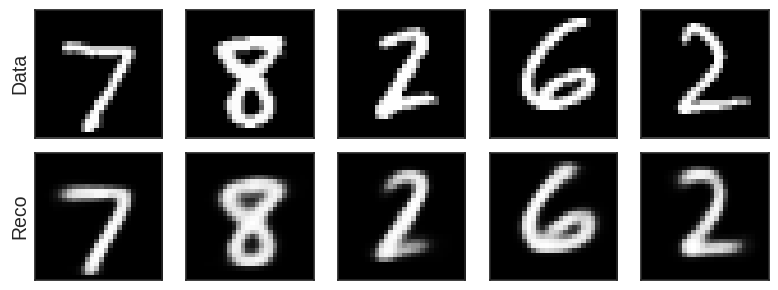

In [4]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = test_dataset['data'][:5]
reco = reconstructions[:5]
nfeat = np.int32(np.sqrt( data[0].shape[-1] ))

fig, ax = plt.subplots(2,5, figsize = (8,3), dpi = 100, facecolor = (1,1,1))
for j in range(5):
    ax[0,j].imshow(data[j][0].reshape(nfeat,nfeat), cmap = 'gray'); ax[0,j].set_xticks([]); ax[0,j].set_yticks([])
    ax[1,j].imshow(reco[j][0].reshape(nfeat,nfeat), cmap = 'gray'); ax[1,j].set_xticks([]); ax[1,j].set_yticks([])
    if j == 0:
        ax[0,j].set_ylabel('Data', fontsize = 14)
        ax[1,j].set_ylabel('Reco', fontsize = 14)
    #end
#end
plt.tight_layout()
plt.show(fig)

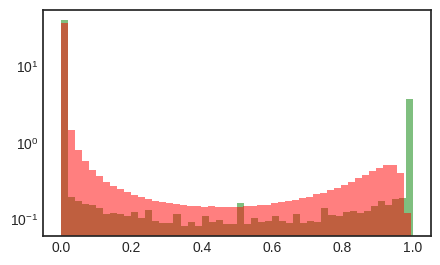

In [23]:
data_flat = torch.cat([batch for batch in test_dataset['data']], dim = 0).numpy().flatten()
reco_flat = torch.cat([batch for batch in reconstructions], dim = 0).numpy().flatten()

fig, ax = plt.subplots(figsize = (5,3), dpi = 100)
ax.hist( data_flat, bins = 50, density = True, facecolor = 'g', alpha = 0.5, label = 'Data' )
ax.hist( reco_flat, bins = 50, density = True, facecolor = 'r', alpha = 0.5, label = 'Reco' )
# ax.set_xscale('log')RUNS
ax.set_yscale('log')
plt.show()

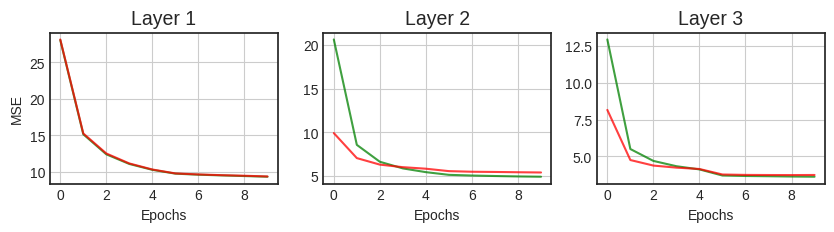

In [5]:
loss_metrics_greedy = pickle.load(open(os.path.join(os.getcwd(), PATH_MODEL, 'gDBN', 'loss_metrics.pkl'), 'rb'))
loss_metrics_iterative = pickle.load(open(os.path.join(os.getcwd(), PATH_MODEL, 'iDBN', 'loss_metrics.pkl'), 'rb'))
glm = loss_metrics_greedy.mean(axis = 0)
ilm = loss_metrics_iterative.mean(axis = 0)

fig, ax = plt.subplots(1,3, figsize = (10,2), dpi = 100)
for i in range(3):
    ax[i].plot(glm[:,i], color = 'g', alpha = 0.75)
    ax[i].plot(ilm[:,i], color = 'r', alpha = 0.75)
    ax[i].grid()
    ax[i].set_title(f'Layer {i+1}', fontsize = 14)
    ax[i].set_xlabel('Epochs')
#end
ax[0].set_ylabel('MSE')
plt.show(fig)

In [6]:
acc_metrics_greedy = pickle.load(open(os.path.join(os.getcwd(), PATH_MODEL, 'gDBN', 'acc_metrics.pkl'), 'rb'))
acc_metrics_iterative = pickle.load(open(os.path.join(os.getcwd(), PATH_MODEL, 'iDBN', 'acc_metrics.pkl'), 'rb'))
gam = np.nanmean(acc_metrics_greedy, axis = 0)
iam = np.nanmean(acc_metrics_iterative, axis = 0)

/tmp/ipykernel_12046/4047822388.py:3: RuntimeWarning: Mean of empty slice
  gam = np.nanmean(acc_metrics_greedy, axis = 0)
/tmp/ipykernel_12046/4047822388.py:4: RuntimeWarning: Mean of empty slice
  iam = np.nanmean(acc_metrics_iterative, axis = 0)


In [10]:
acc_metrics_iterative

array([[[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]]])

Time elapsed : 0.00 seconds
a = 0.2300, afit = 0.2306, ||a - afit|| = 0.0769


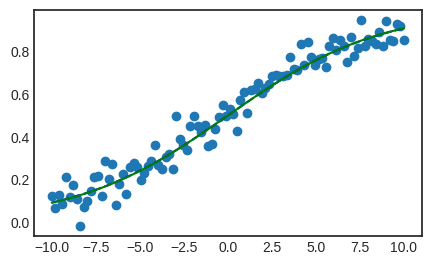

In [49]:
import time
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

def sigmoid(x, a):
    return 1 / (1 + np.exp(-a * x))
#end

a = 0.23
x = np.linspace(-10, 10, 100)
y = sigmoid(x, a)
data = y + np.random.normal(0, 0.05, y.shape)

time_start = time.time()
popt, pcov = curve_fit(sigmoid, x, data, method = 'lm')
residual = np.sqrt( np.divide(np.power(1 - popt[0], 2), x.__len__()) )
print(f'Time elapsed : {(time.time() - time_start):.2f} seconds')
print(f'a = {a:.4f}, afit = {popt[0]:.4f}, ||a - afit|| = {residual:.4f}')

fig, ax = plt.subplots(figsize = (5,3), dpi = 100)
ax.plot(x, y, color = 'b', ls = '--', label = 'Original')
ax.scatter(x, data, label = 'Data')
ax.plot(x, sigmoid(x, popt[0]), color = 'g', ls = '-', label = 'Fit')
plt.show(fig)